In [1]:
# standard libraries
import pandas as pd
import numpy as np
#import re
import os
from IPython.display import Image
#import sklearn
#import time

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
from IPython.display import clear_output

# data pre-processing
from scipy.io import arff
#from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# prediction models
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [2]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [3]:
class ARFFLoader:
    df = pd.DataFrame()
    
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
    
    def load_data(self):
        files = self.retrieve_files()
        for file in files:
            self.df = pd.concat([self.df, self.load_file(file)])
        self.df=self.df.reset_index(drop=True)
        
    def load_file(self, file_name):
        return pd.DataFrame(arff.loadarff(self.file_path_manager.retrieve_full_path()+'/'+file_name)[0])
 
    def retrieve_files(self):
        full_path = self.file_path_manager.retrieve_full_path()
        return [f for f in os.listdir(full_path) if os.path.isfile(join(full_path, f))]
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)

In [4]:
def clean_df(df: pd.DataFrame):
    df['bankrupt'] = ( df['class'] == df['class'][df.shape[0]-1] ).astype(int)
    df = df.drop('class', axis=1)
    return df;

In [5]:
path_manager = FilePathManager('data')
loader = ARFFLoader(path_manager)
loader.load_data()

In [6]:
loader.get_df()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


### Percentage of missing data

In [7]:
loader.get_df()['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [8]:
2091/(41314+2091)

0.04817417348231771

In [9]:
2091/(2091+0)

1.0

In [10]:
(2*(1*(.04817417348231771*1.0)))/(.04817417348231771+1)

0.09192016880604888

In [11]:
missing = loader.get_df().isnull().sum()
pct_missing = missing/loader.size()*100
pct_missing.sort_values(ascending=False).head(15)

Attr37    43.736897
Attr21    13.486925
Attr27     6.367930
Attr60     4.957954
Attr45     4.946435
Attr24     2.124179
Attr64     1.870752
Attr53     1.870752
Attr28     1.870752
Attr54     1.870752
Attr41     1.737127
Attr32     0.847829
Attr52     0.693468
Attr47     0.684253
Attr46     0.311024
dtype: float64

## Modeling

In [12]:
from abc import ABC, abstractmethod

class BaseImputer:
    @abstractmethod
    def fit(self, X, y=None):
        pass
    
    @abstractmethod
    def transform(self, X):
        pass

class BaseModel:
    @abstractmethod
    def fit(self, X, y, sample_weight=None):
        pass
    
    @abstractmethod
    def predict(self, X):
        pass

In [13]:
class XGBModel:
    _model = None
    
    def __init__(self, params, num_round: int = 100):
        self._params = params
        self._num_round = num_round
        
    def fit(self, X, y, sample_weight=None):
        dtrain = xgb.DMatrix(X, label = y)
        self._model = xgb.train(self._params, dtrain)
        
    def predict(self, X):
        dtest = xgb.DMatrix(X)
        return self._model.predict(dtest)
        

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

In [15]:
class Modeling:
    _X_train_fitted = None
    _X_test_fitted = None
    _y_train = None
    _y_test = None
    _y_preds = None
    
    def __init__(self, data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, scaler = None):
        self._data = data
        self._target_name = target_name
        self._shuffle_splitter = shuffle_splitter
        self._imputer = imputer
        self._model = model
        self._X, self._y = self._split_data()
        self._scaler = scaler
        
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y

    @property
    def model(self):
        return self._model
    
    @model.setter
    def model(self, model):
        self._model = model
     
    @property
    def X_train(self):
        return self._X_train_fitted
    
    @property
    def X_test(self):
        return self._X_test_fitted
    
    @property
    def y_train(self):
        return self._y_train
    
    @property
    def y_test(self):
        return self._y_test
    
    @property
    def y_preds(self):
        return self._y_preds
    
    def _split_data(self):
        X = self._data.copy()
        return X.drop([self._target_name], axis=1) , X[self._target_name]
    
    def _shuffle_split(self):
        X = self.X
        y = self.y
        for train_index, test_index in self._shuffle_splitter.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        return X_train, X_test, y_train, y_test
    
    def _fit_imputer(self, train):
        if self._imputer is not None:
            self._imputer.fit(train)
    
    def _fit_scaler(self, train):
        if self._scaler is not None:
            self._scaler.fit(train)
    
    def _impute_data(self, X: pd.DataFrame):
        if self._imputer is not None:
            return pd.DataFrame(self._imputer.transform(X), columns = self.X.columns, index = X.index)
        return X
    
    def _scale_data(self, X: pd.DataFrame):
        if self._scaler is not None:
            X = pd.DataFrame(self._scaler.transform(X), columns = self._X.columns)
        return X
    
    def prepare(self):
        X_train, X_test, y_train, y_test = self._shuffle_split()   
        self._fit_imputer(X_train)
        X_train = self._impute_data(X_train)
        X_test = self._impute_data(X_test)
        self._fit_scaler(X_train)
        self._X_train_fitted = self._scale_data(X_train)
        self._X_test_fitted = self._scale_data(X_test)
        self._y_train = y_train
        self._y_test = y_test
        
    def prepare_and_train(self):
        self.prepare()
        return self.train()
        
    def train(self):
        self._model.fit(self.X_train, self.y_train)
        self._y_preds = self._model.predict(self.X_train)
        
        return self.metrics(self.y_train, self.y_preds)
        
    def test(self):
        return self.metrics(self.y_test, self._model.predict(self.X_test))
       
    @abstractmethod
    def metrics(self, y_true = None, y_pred = None):
        pass
        

In [16]:
class ClassificationModeling(Modeling):
    def __init__(self, 
                 data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, 
                 scaler = None, 
                 beta: int = 1, 
                 classification: str = 'binary'):
        super().__init__(data, target_name, shuffle_splitter, imputer, model, scaler)
        self.beta = beta
        self.classification = classification
    
    def metrics(self, y_true = None, y_pred = None):
        if y_true is None and y_pred is None:
            y_true = self.y_train
            y_pred = self.y_preds
        if type(y_pred[0]) is np.int32: # RandomForest, xbg binary:hinge, xbg multi:softmax
            return ({'matrix': confusion_matrix(y_true, y_pred), 
                'accuracy': accuracy_score(y_true, y_pred), 
                'precision': precision_score(y_true, y_pred, average=self.classification), 
                'recall': recall_score(y_true, y_pred, average=self.classification),
                 'f1': f1_score(y_true, y_pred),
                'f{}'.format(self.beta) : fbeta_score(y_true, y_pred, average=self.classification, beta=self.beta) } )
        else: # to handle xbg binary:logistic with class_weights
            y_pred = pd.Series( (y_pred>0.5).astype(int), index=y_true.index) 
            return ({'matrix': confusion_matrix(y_true, y_pred), 
                'accuracy': accuracy_score(y_true, y_pred), 
                'precision': precision_score(y_true, y_pred, average=self.classification), 
                'recall': recall_score(y_true, y_pred, average=self.classification),
                 'f1': f1_score(y_true, y_pred),
                'f{}'.format(self.beta) : fbeta_score(y_true, y_pred, average=self.classification, beta=self.beta) } )
        

### RandomForest

In [21]:
simple_impute_model = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                               StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1),
                               SimpleImputer(missing_values=np.nan, strategy='median'),
                               RandomForestClassifier(random_state=0, class_weight='balanced', max_depth=13),
                               StandardScaler(), beta=2)

In [22]:
simple_impute_model.prepare_and_train()

{'matrix': array([[28506,   413],
        [   36,  1428]], dtype=int64),
 'accuracy': 0.9852219991442583,
 'precision': 0.7756653992395437,
 'recall': 0.9754098360655737,
 'f1': 0.8641452344931921,
 'f2': 0.9276341431726646}

In [23]:
simple_impute_model.test()

{'matrix': array([[12169,   226],
        [  386,   241]], dtype=int64),
 'accuracy': 0.9530026109660574,
 'precision': 0.5160599571734475,
 'recall': 0.3843700159489633,
 'f1': 0.4405850091407678,
 'f2': 0.4050420168067227}

### Iterative Model

In [24]:
iterative_impute_model = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                               StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                               IterativeImputer(missing_values=np.nan, random_state=1234),
                               RandomForestClassifier(random_state=0, class_weight={0: .02, 1: .98}, max_depth=13),
                               StandardScaler(), beta=2)

In [25]:
iterative_impute_model.prepare_and_train()

C:\Users\parit\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


{'matrix': array([[27147,  1772],
        [    2,  1462]], dtype=int64),
 'accuracy': 0.9416120857058223,
 'precision': 0.4520717377860235,
 'recall': 0.9986338797814208,
 'f1': 0.6223925074499786,
 'f2': 0.8041804180418042}

In [26]:
iterative_impute_model.test()

{'matrix': array([[11507,   888],
        [  257,   370]], dtype=int64),
 'accuracy': 0.9120718783596989,
 'precision': 0.29411764705882354,
 'recall': 0.5901116427432217,
 'f1': 0.3925729442970822,
 'f2': 0.49123738714816784}

### Knn Imputation

In [ ]:
knn_impute_model = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                            StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1234),
                            KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean'),
                            RandomForestClassifier(random_state=0, class_weight='balanced'),
                            StandardScaler(), beta=2)

In [ ]:
knn_impute_model.train()

In [ ]:
knn_impute_model._accuracy

In [ ]:
knn_impute_model._f1

In [ ]:
knn_impute_model.test()

### XGB todo: figure out how to run class_weight with xgb
todo: Should we just remove class = 'balanced' for Random Forest?

### XGB Simple Imputer

In [27]:
num_round = 1000
params = {
    'max_depth': 15,
    'objective': 'multi:softmax',
    'num_class': 2,
    'eta': 0.3
}

In [30]:
xgb_simple_imputer = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                                            StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1),
                                            SimpleImputer(missing_values=np.nan, strategy='median'),
                                            XGBModel(params, num_round),
                                            StandardScaler(),
                                            beta=2)

In [31]:
xgb_simple_imputer.prepare_and_train();

In [32]:
xgb_simple_imputer.metrics()

{'matrix': array([[28919,     0],
        [   65,  1399]], dtype=int64),
 'accuracy': 0.9978606457558503,
 'precision': 1.0,
 'recall': 0.9556010928961749,
 'f1': 0.9772965420887182,
 'f2': 0.9641626464507237}

In [33]:
xgb_simple_imputer.test()

{'matrix': array([[12366,    29],
        [  332,   295]], dtype=int64),
 'accuracy': 0.9722776839195209,
 'precision': 0.9104938271604939,
 'recall': 0.4704944178628389,
 'f1': 0.6203995793901156,
 'f2': 0.5208333333333334}

### XGB Iterative

In [34]:
params2 = {
    'max_depth': 15,
    'objective': 'multi:softmax',
    'num_class': 2,
    'eta': 0.3
}

In [35]:
xgb_iterative_imputer = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                                 StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1),
                                 IterativeImputer(missing_values=np.nan, random_state=1234),
                                 XGBModel(params2, num_round),
                                 StandardScaler(), 
                                 beta=2)

In [36]:
xgb_iterative_imputer.prepare_and_train()

C:\Users\parit\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


{'matrix': array([[28919,     0],
        [   60,  1404]], dtype=int64),
 'accuracy': 0.9980252114669388,
 'precision': 1.0,
 'recall': 0.9590163934426229,
 'f1': 0.9790794979079497,
 'f2': 0.9669421487603306}

In [38]:
xgb_iterative_imputer.test()

{'matrix': array([[12356,    39],
        [  325,   302]], dtype=int64),
 'accuracy': 0.9720473045615113,
 'precision': 0.8856304985337243,
 'recall': 0.48165869218500795,
 'f1': 0.6239669421487603,
 'f2': 0.5300105300105299}

### No Imputer

In [39]:
xgb_no_imputer = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                                        StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                                        None,
                                        XGBModel(params2, num_round),
                                        StandardScaler(), beta=2)

In [40]:
xgb_no_imputer.prepare_and_train()

{'matrix': array([[28919,     0],
        [   69,  1395]], dtype=int64),
 'accuracy': 0.9977289931869796,
 'precision': 1.0,
 'recall': 0.9528688524590164,
 'f1': 0.975865687303253,
 'f2': 0.9619362846503929}

In [41]:
xgb_no_imputer._accuracy

AttributeError: 'ClassificationModeling' object has no attribute '_accuracy'

In [ ]:
xgb_no_imputer._f1

In [ ]:
xgb_no_imputer.test()

### Cost Matrix
False Negative = "Incorrectly predicting Bankruptcy to be Solvency" which is related to Recall.  The cost of a False Negative is assumed to be a 100% loss = 1

False Positive = "Incorrectly predicting Solvency to be Bankruptcy" which is related to Precision.  The team assumes a False Positive occurs for a company that is already under significant financial duress, likely with investor losses of approximately 50% = 0.5  

In [42]:
cost_matrix = np.array([[0,0.5],[1,0]])
cost_matrix

array([[0. , 0.5],
       [1. , 0. ]])

### Examining Depth vs Metrics

In [45]:
forest_modeling = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1),
                           IterativeImputer(missing_values=np.nan, random_state=1),
                           None,
                           StandardScaler(), beta=2)
forest_modeling.prepare()

C:\Users\parit\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


#### Random Forest with no class weights

In [48]:
results0 = pd.DataFrame()
for i in range(4,21):
    forest_modeling.model = RandomForestClassifier(random_state=0, class_weight=None, max_depth = i)
    train_out = forest_modeling.train()
    test_out = forest_modeling.test()
    results0 = results0.append({'max_depth': forest_modeling.model.max_depth,
                    'accuracy_train': train_out['accuracy'],
                    'accuracy_test': test_out['accuracy'],
                    'f1_train': train_out['f1'],          
                    'f1_test': test_out['f1'],
                    'f2_train': train_out['f2'],          
                    'f2_test': test_out['f2'],           
                    '%_invest_loss_train': np.sum(cost_matrix*train_out['matrix'])/np.sum(train_out['matrix']),
                    '%_invest_loss_test': np.sum(cost_matrix*test_out['matrix'])/np.sum(test_out['matrix'])}, 
                    ignore_index = True)
    print("max_depth =",i,"complete")
clear_output()
results0

,max_depth,accuracy_train,accuracy_test,f1_train,f1_test,f2_train,f2_test,%_invest_loss_train,%_invest_loss_test
0,4.0,0.952671,0.952619,0.034899,0.031397,0.022101,0.019857,0.047329,0.047381
1,5.0,0.953691,0.953156,0.074951,0.052795,0.048199,0.033663,0.046309,0.046844
2,6.0,0.958694,0.956919,0.249851,0.192806,0.172300,0.130047,0.041306,0.043043
3,7.0,0.962709,0.959146,0.368802,0.267218,0.267496,0.186038,0.037291,0.040777
4,8.0,0.967317,0.961834,0.486822,0.346912,0.372214,0.249811,0.032683,0.038089
5,9.0,0.970181,0.963139,0.551929,0.384615,0.434986,0.281849,0.029819,0.036746
6,10.0,0.972715,0.963600,0.605050,0.396947,0.489139,0.292463,0.027285,0.036285
7,11.0,0.975414,0.964829,0.657497,0.430348,0.545413,0.322160,0.024586,0.035018
8,12.0,0.978244,0.964829,0.708425,0.433168,0.602943,0.325400,0.021756,0.034941
9,13.0,0.981108,0.965213,0.756160,0.449575,0.659650,0.342086,0.018892,0.034365


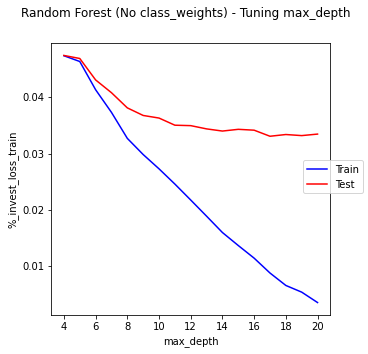

In [50]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Random Forest (No class_weights) - Tuning max_depth')

sns.lineplot(data=results0, x='max_depth', y='%_invest_loss_train', color='blue')
sns.lineplot(data=results0, x='max_depth', y='%_invest_loss_test', color='red')

fig.legend(['Train','Test'], loc='right')
plt.show()

#### XGBoost with no rebalanced class_weight

In [53]:
results00 = pd.DataFrame()
for i in range(4,21):
    params = {
    'max_depth': i,
    'objective': 'multi:softmax',
    'eval_metric': 'logloss',
    'num_class': 2,
    'eta': 0.3,
    }
    forest_modeling.model = XGBModel(params) #num_round
    train_out = forest_modeling.train()
    test_out = forest_modeling.test()
    results00 = results00.append({'max_depth': i,
                    'accuracy_train': train_out['accuracy'],
                    'accuracy_test': test_out['accuracy'],
                    'f2_train': train_out['f2'],            
                    'f2_test': test_out['f2'], 
                    '%_invest_loss_train': np.sum(cost_matrix*train_out['matrix'])/np.sum(train_out['matrix']),
                    '%_invest_loss_test': np.sum(cost_matrix*test_out['matrix'])/np.sum(test_out['matrix'])}, 
                    ignore_index = True)
    print("max_depth =",i,"complete")
clear_output()
results00

,max_depth,accuracy_train,accuracy_test,f2_train,f2_test,%_invest_loss_train,%_invest_loss_test
0,4.0,0.971563,0.969820,0.473473,0.437228,0.028207,0.029911
1,5.0,0.973505,0.970435,0.508202,0.445975,0.026429,0.029412
2,6.0,0.975809,0.970127,0.555893,0.446816,0.024125,0.029527
3,7.0,0.979199,0.971971,0.623693,0.493209,0.020752,0.027492
4,8.0,0.983181,0.971510,0.701922,0.487848,0.016753,0.027838
5,9.0,0.987131,0.971587,0.774282,0.500888,0.012869,0.027454
6,10.0,0.991048,0.971433,0.845630,0.507605,0.008952,0.027338
7,11.0,0.993352,0.972585,0.886485,0.529930,0.006648,0.026225
8,12.0,0.995326,0.971894,0.920869,0.515719,0.004674,0.026916
9,13.0,0.996544,0.971971,0.941788,0.522887,0.003456,0.026686


#### Overfits faster than Random Forest

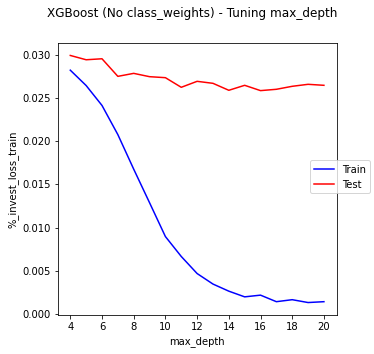

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('XGBoost (No class_weights) - Tuning max_depth')

sns.lineplot(data=results00, x='max_depth', y='%_invest_loss_train', color='blue')
sns.lineplot(data=results00, x='max_depth', y='%_invest_loss_test', color='red')

fig.legend(['Train','Test'], loc='right')
plt.show()

#### Random Forest with rebalanced classes

In [55]:
results = pd.DataFrame()
for i in range(4,21):
    forest_modeling.model = RandomForestClassifier(random_state=0, class_weight='balanced', max_depth = i)
    train_out = forest_modeling.train()
    test_out = forest_modeling.test()
    results = results.append({'max_depth': forest_modeling.model.max_depth,
                    'accuracy_train': train_out['accuracy'],
                    'accuracy_test': test_out['accuracy'],
                    'f1_train': train_out['f1'],          
                    'f1_test': test_out['f1'],
                    'f2_train': train_out['f2'],          
                    'f2_test': test_out['f2'],           
                    '%_invest_loss_train': np.sum(cost_matrix*train_out['matrix'])/np.sum(train_out['matrix']),
                    '%_invest_loss_test': np.sum(cost_matrix*test_out['matrix'])/np.sum(test_out['matrix'])}, 
                    ignore_index = True)
    print("max_depth =",i,"complete")
clear_output()
results

,max_depth,accuracy_train,accuracy_test,f1_train,f1_test,f2_train,f2_test,%_invest_loss_train,%_invest_loss_test
0,4.0,0.777639,0.776302,0.257419,0.241209,0.434025,0.404720,0.116002,0.118146
1,5.0,0.814995,0.813009,0.297111,0.274650,0.479458,0.440053,0.097044,0.099869
2,6.0,0.849719,0.847796,0.351605,0.315135,0.541368,0.477487,0.078860,0.082668
3,7.0,0.883224,0.877208,0.418932,0.358089,0.609164,0.510064,0.061432,0.068346
4,8.0,0.913373,0.900706,0.498284,0.389807,0.678045,0.516250,0.045897,0.057864
5,9.0,0.941777,0.923130,0.601487,0.433503,0.755860,0.524945,0.031235,0.047804
6,10.0,0.958595,0.938873,0.684078,0.463612,0.813231,0.511144,0.022381,0.041430
7,11.0,0.972550,0.948702,0.770121,0.490854,0.870948,0.504228,0.014827,0.037360
8,12.0,0.979923,0.951620,0.823495,0.486971,0.906600,0.480862,0.010713,0.036784
9,13.0,0.985946,0.955537,0.870724,0.487157,0.934373,0.456811,0.007455,0.035747


#### Minimum investing loss of ~2% without overfitting Random Forest is at max_depth = 12

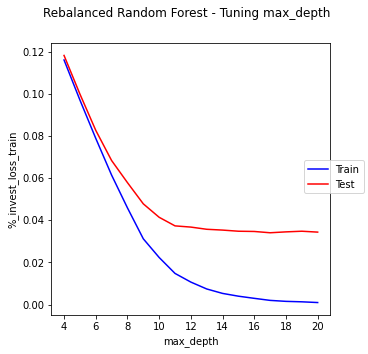

In [56]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Rebalanced Random Forest - Tuning max_depth')

sns.lineplot(data=results, x='max_depth', y='%_invest_loss_train', color='blue')
sns.lineplot(data=results, x='max_depth', y='%_invest_loss_test', color='red')

fig.legend(['Train','Test'], loc='right')
plt.show()

#### XG Boost with rebalanced classes

In [57]:
df = loader.get_df()

In [58]:
# scale_pos_weight
np.bincount(df['bankrupt'])[0]/np.bincount(df['bankrupt'])[1]

19.758010521281683

In [59]:
results2 = pd.DataFrame()
for i in range(2,20):
    params = {
    'max_depth': i,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    #'num_class': 2,
    'eta': 0.3,
    'scale_pos_weight': 19.758 
    }
    forest_modeling.model = XGBModel(params) #num_round
    train_out = forest_modeling.train()
    test_out = forest_modeling.test()
    results2 = results2.append({'max_depth': i,
                    'accuracy_train': train_out['accuracy'],
                    'accuracy_test': test_out['accuracy'],
                    'f2_train': train_out['f2'],            
                    'f2_test': test_out['f2'], 
                    '%_invest_loss_train': np.sum(cost_matrix*train_out['matrix'])/np.sum(train_out['matrix']),
                    '%_invest_loss_test': np.sum(cost_matrix*test_out['matrix'])/np.sum(test_out['matrix'])}, 
                    ignore_index = True)
    print("max_depth =",i,"complete")
clear_output()
results2

,max_depth,accuracy_train,accuracy_test,f2_train,f2_test,%_invest_loss_train,%_invest_loss_test
0,2.0,0.784913,0.780909,0.445280,0.416373,0.112152,0.115458
1,3.0,0.844288,0.845876,0.522757,0.495876,0.082102,0.082668
2,4.0,0.872527,0.868684,0.593338,0.542838,0.066666,0.070611
3,5.0,0.894678,0.888573,0.646484,0.569972,0.054965,0.060897
4,6.0,0.920679,0.907234,0.721234,0.591796,0.041059,0.052066
5,7.0,0.937037,0.922055,0.773360,0.603719,0.032337,0.045346
6,8.0,0.954317,0.931117,0.828707,0.606598,0.023352,0.041430
7,9.0,0.967120,0.944479,0.874050,0.622837,0.016687,0.035248
8,10.0,0.979199,0.953694,0.918933,0.622733,0.010466,0.031408
9,11.0,0.987592,0.959760,0.949811,0.633344,0.006253,0.028529


#### Minimum investing loss of ~2% without overfitting rebalanced XGBoost is at max_depth = 10
Very similar to rebalanced Random Forest above

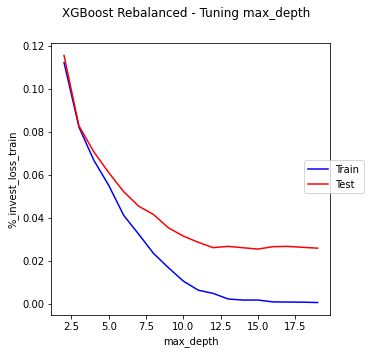

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('XGBoost Rebalanced - Tuning max_depth')

sns.lineplot(data=results2, x='max_depth', y='%_invest_loss_train', color='blue')
sns.lineplot(data=results2, x='max_depth', y='%_invest_loss_test', color='red')

fig.legend(['Train','Test'], loc='right')
plt.show()

In [63]:
results3 = pd.DataFrame()
for i in range(0,10):
    eta = 0.1 + i*0.1
    params = {
    'max_depth': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    #'num_class': 2,
    'scale_pos_weight': 19.758, 
    'eta': eta
    }
    forest_modeling.model = XGBModel(params) #num_round
    train_out = forest_modeling.train()
    test_out = forest_modeling.test()
    results3 = results3.append({'eta': eta,
                    'accuracy_train': train_out['accuracy'],
                    'accuracy_test': test_out['accuracy'],
                    'f2_train': train_out['f2'],            
                    'f2_test': test_out['f2'], 
                    '%_invest_loss_train': np.sum(cost_matrix*train_out['matrix'])/np.sum(train_out['matrix']),
                    '%_invest_loss_test': np.sum(cost_matrix*test_out['matrix'])/np.sum(test_out['matrix'])}, 
                    ignore_index = True)
    print("eta =",eta,"complete")
clear_output()
results3

,eta,accuracy_train,accuracy_test,f2_train,f2_test,%_invest_loss_train,%_invest_loss_test
0,0.1,0.963039,0.938258,0.856870,0.594664,0.018909,0.038857
1,0.2,0.968436,0.947320,0.878288,0.629554,0.016029,0.033827
2,0.3,0.979199,0.953694,0.918933,0.622733,0.010466,0.031408
3,0.4,0.981931,0.954769,0.929833,0.621959,0.009051,0.030986
4,0.5,0.986703,0.957917,0.947293,0.630963,0.006665,0.029373
5,0.6,0.992397,0.962448,0.969408,0.634446,0.003801,0.027377
6,0.7,0.994701,0.964752,0.978479,0.632184,0.002650,0.026494
7,0.8,0.997104,0.965290,0.988121,0.630010,0.001448,0.026340
8,0.9,0.999177,0.967056,0.996596,0.609037,0.000411,0.026263
9,1.0,0.999177,0.965520,0.996596,0.605075,0.000411,0.027031


### Minimum investing loss without overfitting balanced XGBoost is at eta = 0.4

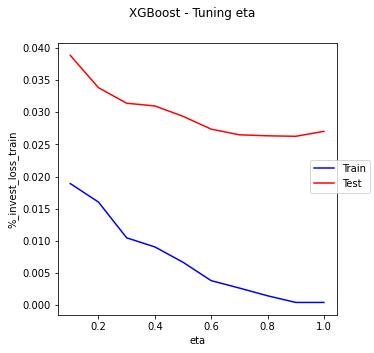

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('XGBoost - Tuning eta')

sns.lineplot(data=results3, x='eta', y='%_invest_loss_train', color='blue')
sns.lineplot(data=results3, x='eta', y='%_invest_loss_test', color='red')

fig.legend(['Train','Test'], loc='right')
plt.show()

In [65]:
XGB_Classifier_Model = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           IterativeImputer(missing_values=np.nan, random_state=1234),
                           None,
                           StandardScaler(), beta=2)
XGB_Classifier_Model.prepare()

C:\Users\parit\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### ?? XGBClassifier is completely overfitting the model using the same parameters tuned with xgb ??

In [66]:
XGB_Classifier_Model.model = XGBClassifier(max_depth=10, eval_metric='mlogloss', eta=0.4, scale_pos_weight= 19.758)
xgb_train1 = XGB_Classifier_Model.train()
xgb_train1

{'matrix': array([[28919,     0],
        [    0,  1464]], dtype=int64),
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'f2': 1.0}

In [67]:
invest_loss_train1 = np.sum(cost_matrix*xgb_train1['matrix'])/np.sum(xgb_train1['matrix'])
invest_loss_train1

0.0

In [68]:
xgb_test1 = XGB_Classifier_Model.test()
xgb_test1

{'matrix': array([[12337,    58],
        [  242,   385]], dtype=int64),
 'accuracy': 0.9769620641990477,
 'precision': 0.8690744920993227,
 'recall': 0.6140350877192983,
 'f1': 0.7196261682242991,
 'f2': 0.6523212470349035}

In [69]:
invest_loss_test1 = np.sum(cost_matrix*xgb_test1['matrix'])/np.sum(xgb_test1['matrix'])
invest_loss_test1

0.02081093534019352

### Best XGB 

In [71]:
'''params2 = {
    'max_depth': 11,
    'objective': 'binary:hinge', #'multi:softmax',
    #'num_class': 2,
    'eta': 0.3
}

please_work = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',
                                 StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1),
                                 IterativeImputer(missing_values=np.nan, random_state=1),
                                 XGBModel(params2),
                                 StandardScaler(), 
                                 beta=2)'''

"params2 = {\n    'max_depth': 11,\n    'objective': 'binary:hinge', #'multi:softmax',\n    #'num_class': 2,\n    'eta': 0.3\n}\n\nplease_work = ClassificationModeling(clean_df(loader.get_df()),'bankrupt',\n                                 StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1),\n                                 IterativeImputer(missing_values=np.nan, random_state=1),\n                                 XGBModel(params2),\n                                 StandardScaler(), \n                                 beta=2)"

In [ ]:
#please_work.prepare_and_train() # eta=0.6

In [ ]:
#please_work.test() # eta=0.6

In [ ]:
#please_work.prepare_and_train() # eta=0.3

In [ ]:
#please_work.test() # eta=0.3